<a href="https://colab.research.google.com/github/river6907/Bigdata-Analysis/blob/main/Report11_clustering_Lifedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 11. 삶의 질 데이터를 이용한 클러스터링 연습

In [67]:
!rm *.xlsx

In [68]:
from google.colab import files
uploaded = files.upload()

Saving 국가별삶의질_2021.xlsx to 국가별삶의질_2021.xlsx


In [69]:
# (1)data Load
# 24개 속성값을 가지는 42개(41개 국 + OECD ) 엑셀 데이터  로드, 0번째 칼럼은 인덱스로 설정
import pandas as pd 

data = pd.read_excel('국가별삶의질_2021.xlsx',index_col = 0)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [70]:
#(2) 데이터 타입, 행,열 레이블, 크기, 정보 확인
print("data.dtypes = \n", data.dtypes)    #데이터 타입들
print("data.index = \n", data.index)     
print("\ndata.columns = \n", data.columns) 

print("data.shape = ", data.shape)      #크기
print("data.info() = ")
print( data.info())        #데이터 정보


#(3)데이터 상위 일부 확인
display("data.head() =", data.head())         #상위 5개 

data.dtypes = 
 2021       object
2021.1     object
2021.2     object
2021.3     object
2021.4     object
2021.5     object
2021.6     object
2021.7     object
2021.8     object
2021.9     object
2021.10    object
2021.11    object
2021.12    object
2021.13    object
2021.14    object
2021.15    object
2021.16    object
2021.17    object
2021.18    object
2021.19    object
2021.20    object
2021.21    object
2021.22    object
2021.23    object
dtype: object
data.index = 
 Index(['국가', '　　　대한민국', '　　　이스라엘', '　　　일본', '　　　튀르키예', '　　　캐나다', '　　　멕시코',
       '　　　미국', '　　　브라질', '　　　칠레', '　　　콜롬비아', '　　　오스트리아', '　　　벨기에', '　　　체코',
       '　　　덴마크', '　　　에스토니아', '　　　핀란드', '　　　프랑스', '　　　독일', '　　　그리스', '　　　헝가리',
       '　　　아이슬란드', '　　　아일랜드', '　　　이탈리아', '　　　라트비아', '　　　리투아니아', '　　　룩셈부르크',
       '　　　네덜란드', '　　　노르웨이', '　　　폴란드', '　　　포르투갈', '　　　러시아', '　　　슬로바키아',
       '　　　슬로베니아', '　　　스페인', '　　　스웨덴', '　　　스위스', '　　　영국', '　　　남아프리카공화국',
       '　　　오스트레일리아', '　　　뉴질랜드', '　　　OECD'],
      dtype='object', name='

'data.head() ='

,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,...,2021.14,2021.15,2021.16,2021.17,2021.18,2021.19,2021.20,2021.21,2021.22,2021.23
국가,,,,,,,,,,,,,,,,,,,,,
국가,비시설 주거 (%),주택 비용 (%),1인당 방수 (비율),가계 처분가능소득 ($),가계 순자산 ($),노동시장 불안정성 (%),고용률 (%),장기 실업률 (%),개인 소득 ($),인적네트워크 (%),...,수질 (%),이해관계자의 규제개발 참여 (점),투표율 (%),기대수명 (년),자각 건강 (%),삶의 만족도 (점),야간단독보행안전 (%),살인율 (비율),장시간 근로 고용인 (%),1일당 여가시간 (시간)
대한민국,2.5,15.0,1.5,24590.0,362340.0,2.9,66.0,0.0,41960.0,80.0,...,82.0,2.9,77.0,83.3,34.0,5.8,82.0,0.8,NaN,14.8
이스라엘,NaN,NaN,1.2,NaN,NaN,4.6,67.0,0.2,39322.0,95.0,...,77.0,2.5,67.0,82.9,74.0,7.2,80.0,1.5,14.1,NaN
일본,6.4,22.0,1.9,28872.0,294735.0,2.7,77.0,0.8,38515.0,89.0,...,87.0,1.4,53.0,84.4,37.0,6.1,77.0,0.2,NaN,14.1
튀르키예,4.9,19.0,1.0,NaN,NaN,13.0,48.0,3.3,NaN,85.0,...,62.0,1.5,86.0,78.6,67.0,4.9,59.0,1.0,25.0,14.6


In [71]:
#(4)칼럼을 속성명 약자로 변경 후 기존 속성명 행 삭제
#(WF, HE, RP, HD, HW, LI, ER,LU,  PE, SN,  EA, SS, EY, AP, WQ, SE, VT, LE. SH, KS, SW, HR, EWL. TL)

data.columns = ('WF', 'HE', 'RP', 'HD', 'HW', 'LI', 'ER','LU', 'PE', 'SN', 'EA', 'SS', 'EY', 'AP', 'WQ', 'SE', 'VT', 'LE', 'SH', 'LS', 'SW', 'HR', 'EWL', 'TL')
data.drop(['국가'], inplace=True)

#(5) 행 레이블, 열 레이블 확인
print("data.index = ", data.index)      #행 레이블
print("data.columns = ", data.columns)  #열 레이블

#(6)데이터 상위, 하위 일부 확인
display("data.head() =", data.head())         #상위 5개 
display("data.tail() =", data.tail())         #하위 5개 

#(7)index내의 각 국가명의 공백 제거
data.index = data.index.str.strip() 


#(8)수정된 행 레이블 확인
print("data.index = ", data.index)    

data.index =  Index(['　　　대한민국', '　　　이스라엘', '　　　일본', '　　　튀르키예', '　　　캐나다', '　　　멕시코', '　　　미국',
       '　　　브라질', '　　　칠레', '　　　콜롬비아', '　　　오스트리아', '　　　벨기에', '　　　체코', '　　　덴마크',
       '　　　에스토니아', '　　　핀란드', '　　　프랑스', '　　　독일', '　　　그리스', '　　　헝가리', '　　　아이슬란드',
       '　　　아일랜드', '　　　이탈리아', '　　　라트비아', '　　　리투아니아', '　　　룩셈부르크', '　　　네덜란드',
       '　　　노르웨이', '　　　폴란드', '　　　포르투갈', '　　　러시아', '　　　슬로바키아', '　　　슬로베니아',
       '　　　스페인', '　　　스웨덴', '　　　스위스', '　　　영국', '　　　남아프리카공화국', '　　　오스트레일리아',
       '　　　뉴질랜드', '　　　OECD'],
      dtype='object', name='국가')
data.columns =  Index(['WF', 'HE', 'RP', 'HD', 'HW', 'LI', 'ER', 'LU', 'PE', 'SN', 'EA', 'SS',
       'EY', 'AP', 'WQ', 'SE', 'VT', 'LE', 'SH', 'LS', 'SW', 'HR', 'EWL',
       'TL'],
      dtype='object')


'data.head() ='

,WF,HE,RP,HD,HW,LI,ER,LU,PE,SN,...,WQ,SE,VT,LE,SH,LS,SW,HR,EWL,TL
국가,,,,,,,,,,,,,,,,,,,,,
대한민국,2.5,15.0,1.5,24590.0,362340.0,2.9,66.0,0.0,41960.0,80.0,...,82.0,2.9,77.0,83.3,34.0,5.8,82.0,0.8,NaN,14.8
이스라엘,NaN,NaN,1.2,NaN,NaN,4.6,67.0,0.2,39322.0,95.0,...,77.0,2.5,67.0,82.9,74.0,7.2,80.0,1.5,14.1,NaN
일본,6.4,22.0,1.9,28872.0,294735.0,2.7,77.0,0.8,38515.0,89.0,...,87.0,1.4,53.0,84.4,37.0,6.1,77.0,0.2,NaN,14.1
튀르키예,4.9,19.0,1.0,NaN,NaN,13.0,48.0,3.3,NaN,85.0,...,62.0,1.5,86.0,78.6,67.0,4.9,59.0,1.0,25.0,14.6
캐나다,0.2,23.0,2.6,34421.0,478240.0,3.8,70.0,0.5,55342.0,93.0,...,90.0,2.9,68.0,82.1,89.0,7.0,78.0,1.2,3.3,14.6


'data.tail() ='

,WF,HE,RP,HD,HW,LI,ER,LU,PE,SN,...,WQ,SE,VT,LE,SH,LS,SW,HR,EWL,TL
국가,,,,,,,,,,,,,,,,,,,,,
영국,0.5,23.0,2.0,33049.0,524422.0,3.3,75.0,0.9,47147.0,93.0,...,82.0,3.1,68.0,81.3,73.0,6.8,78.0,0.2,10.8,14.9
남아프리카공화국,35.9,18.0,NaN,9338.0,NaN,NaN,39.0,17.9,NaN,89.0,...,72.0,NaN,66.0,64.2,NaN,4.9,40.0,13.7,15.4,NaN
오스트레일리아,NaN,19.0,NaN,37433.0,528768.0,3.1,73.0,1.0,55206.0,93.0,...,92.0,2.7,92.0,83.0,85.0,7.1,67.0,0.9,12.5,14.4
뉴질랜드,NaN,25.0,2.4,39024.0,514162.0,4.5,77.0,0.4,45269.0,95.0,...,85.0,2.5,82.0,82.1,86.0,7.3,66.0,1.3,14.0,14.9
OECD,3.0,21.0,1.7,30490.0,323960.0,5.1,66.0,1.3,49165.0,91.0,...,84.0,2.1,69.0,81.0,68.0,6.7,74.0,2.6,10.2,15.1


data.index =  Index(['대한민국', '이스라엘', '일본', '튀르키예', '캐나다', '멕시코', '미국', '브라질', '칠레', '콜롬비아',
       '오스트리아', '벨기에', '체코', '덴마크', '에스토니아', '핀란드', '프랑스', '독일', '그리스', '헝가리',
       '아이슬란드', '아일랜드', '이탈리아', '라트비아', '리투아니아', '룩셈부르크', '네덜란드', '노르웨이',
       '폴란드', '포르투갈', '러시아', '슬로바키아', '슬로베니아', '스페인', '스웨덴', '스위스', '영국',
       '남아프리카공화국', '오스트레일리아', '뉴질랜드', 'OECD'],
      dtype='object', name='국가')


In [72]:
#(8)누락된 값의 합 확인 
print('\n Sum of Null Values \n')
s = data.isnull().sum()
#s = data.isna().sum()
print (s)

#(7)누락값이 큰 열 'HW', 'TL' 'EWL' 삭제
data.drop(columns=['HW','TL','EWL'],inplace=True)

#(5)데이터 내용 일부 확인
display("data.head() =", data.head(5))         #상위 5개 

#(4)누락된 값 있는 행삭제
data.dropna(how='any', inplace=True) 

#(5)데이터 내용 일부 확인
display("data.head() =", data.head())         #상위 5개 

#(6)누락된 값의 합 확인 
print('\n Sum of Null Values \n')
s = data.isnull().sum()
print (s)


 Sum of Null Values 

WF      3
HE      4
RP      3
HD      6
HW     11
LI      6
ER      0
LU      2
PE      5
SN      0
EA      1
SS      2
EY      1
AP      0
WQ      0
SE      2
VT      0
LE      0
SH      2
LS      0
SW      0
HR      0
EWL     2
TL     18
dtype: int64


'data.head() ='

,WF,HE,RP,HD,LI,ER,LU,PE,SN,EA,...,EY,AP,WQ,SE,VT,LE,SH,LS,SW,HR
국가,,,,,,,,,,,,,,,,,,,,,
대한민국,2.5,15.0,1.5,24590.0,2.9,66.0,0.0,41960.0,80.0,89.0,...,17.0,27.0,82.0,2.9,77.0,83.3,34.0,5.8,82.0,0.8
이스라엘,NaN,NaN,1.2,NaN,4.6,67.0,0.2,39322.0,95.0,88.0,...,16.0,20.0,77.0,2.5,67.0,82.9,74.0,7.2,80.0,1.5
일본,6.4,22.0,1.9,28872.0,2.7,77.0,0.8,38515.0,89.0,NaN,...,16.0,14.0,87.0,1.4,53.0,84.4,37.0,6.1,77.0,0.2
튀르키예,4.9,19.0,1.0,NaN,13.0,48.0,3.3,NaN,85.0,42.0,...,19.0,27.0,62.0,1.5,86.0,78.6,67.0,4.9,59.0,1.0
캐나다,0.2,23.0,2.6,34421.0,3.8,70.0,0.5,55342.0,93.0,92.0,...,17.0,7.0,90.0,2.9,68.0,82.1,89.0,7.0,78.0,1.2


'data.head() ='

,WF,HE,RP,HD,LI,ER,LU,PE,SN,EA,...,EY,AP,WQ,SE,VT,LE,SH,LS,SW,HR
국가,,,,,,,,,,,,,,,,,,,,,
대한민국,2.5,15.0,1.5,24590.0,2.9,66.0,0.0,41960.0,80.0,89.0,...,17.0,27.0,82.0,2.9,77.0,83.3,34.0,5.8,82.0,0.8
캐나다,0.2,23.0,2.6,34421.0,3.8,70.0,0.5,55342.0,93.0,92.0,...,17.0,7.0,90.0,2.9,68.0,82.1,89.0,7.0,78.0,1.2
멕시코,25.9,18.0,1.1,16269.0,4.0,59.0,0.1,16230.0,77.0,42.0,...,15.0,20.0,75.0,3.2,63.0,75.1,66.0,6.0,42.0,26.8
미국,0.1,18.0,2.4,51147.0,4.2,67.0,0.5,69392.0,94.0,92.0,...,17.0,8.0,88.0,3.1,65.0,78.9,88.0,7.0,78.0,6.0
오스트리아,0.8,21.0,1.6,37001.0,2.3,72.0,1.3,53132.0,92.0,86.0,...,17.0,12.0,92.0,1.3,76.0,82.0,71.0,7.2,86.0,0.5



 Sum of Null Values 

WF    0
HE    0
RP    0
HD    0
LI    0
ER    0
LU    0
PE    0
SN    0
EA    0
SS    0
EY    0
AP    0
WQ    0
SE    0
VT    0
LE    0
SH    0
LS    0
SW    0
HR    0
dtype: int64


# 1) 개인 소득 Personal earnings (PE)과 삶의 만족도 Life satisfaction (LS)를 이용하여 K-means 클러스터링 처리 결과 확인

In [73]:
from sklearn.cluster import KMeans

In [74]:
X2 = data[['PE','LS']]
k = 3
#kmeans clustering, k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
#X2에 대한  kmeans clustering을 학습하고 예측
#예측값  y_pred == kmeans cluster label
y_pred = kmeans.fit_predict(X2)  
print('y_pred=', y_pred)
print('kmeans.labels_=',  kmeans.labels_) 
print('kmeans.cluster_centers_=', kmeans.cluster_centers_)

y_pred= [2 1 0 1 1 1 0 1 0 2 2 1 0 0 2 2 0 1 1 1 0 0 0 2 2 2 2]
kmeans.labels_= [2 1 0 1 1 1 0 1 0 2 2 1 0 0 2 2 0 1 1 1 0 0 0 2 2 2 2]
kmeans.cluster_centers_= [[2.70981111e+04 6.20000000e+00]
 [5.83144444e+04 7.22222222e+00]
 [4.50878889e+04 6.80000000e+00]]


In [75]:
import numpy as np
import matplotlib.pyplot as plt

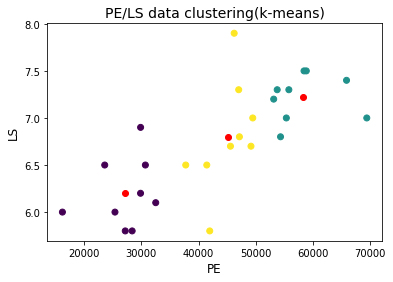

In [76]:
#clustering result plotting
centers = kmeans.cluster_centers_   
plt.scatter(X2['PE'], X2['LS'], c=data)   
plt.plot(centers[0, 0], centers[0, 1], "ro")
plt.plot(centers[1, 0], centers[1, 1], "ro")
plt.plot(centers[2, 0], centers[2, 1], "ro")
plt.xlabel("PE", fontsize=12)
plt.ylabel("LS", fontsize=12)
plt.title("PE/LS data clustering(k-means)", fontsize=14)
plt.show()

# 2) LS등급인 LSL을 칼라로 설정한 scatter plot과 비교


In [77]:
def fun(x):
    if x < 6.5:
        return 1
    elif 6.5 <= x < 7.25:
        return 2
    elif 7.25 <= x:
        return 3

data['LSL'] = data['LS'].apply(fun)

In [82]:
X2 = data[['PE','LS']]
y = data['LSL'].values
k = 3
#kmeans clustering, k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
#X2에 대한  kmeans clustering을 학습하고 예측
#예측값  y_pred == kmeans cluster label
y_pred = kmeans.fit_predict(X2)  
print('y_pred=', y_pred)
print('kmeans.labels_=',  kmeans.labels_) 
print('kmeans.cluster_centers_=', kmeans.cluster_centers_)

y_pred= [2 1 0 1 1 1 0 1 0 2 2 1 0 0 2 2 0 1 1 1 0 0 0 2 2 2 2]
kmeans.labels_= [2 1 0 1 1 1 0 1 0 2 2 1 0 0 2 2 0 1 1 1 0 0 0 2 2 2 2]
kmeans.cluster_centers_= [[2.70981111e+04 6.20000000e+00]
 [5.83144444e+04 7.22222222e+00]
 [4.50878889e+04 6.80000000e+00]]


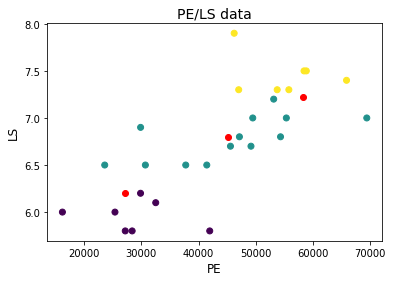

In [84]:
#clustering result plotting
centers = kmeans.cluster_centers_   
plt.scatter(X2['PE'], X2['LS'], c=y)   
plt.plot(centers[0, 0], centers[0, 1], "ro")
plt.plot(centers[1, 0], centers[1, 1], "ro")
plt.plot(centers[2, 0], centers[2, 1], "ro")
plt.xlabel("PE", fontsize=12)
plt.ylabel("LS", fontsize=12)
plt.title("PE/LS data", fontsize=14)
plt.show()